In [3]:
import numpy as np
import matplotlib.pyplot as plt      
from mpl_toolkits import mplot3d
from sklearn import preprocessing

^C
ERROR: Operation cancelled by user


ModuleNotFoundError: No module named 'sklearn'

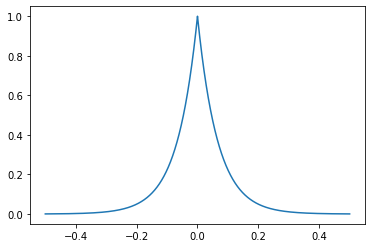

In [11]:
range_start=-0.5
range_end =0.5
gamma = 15
sample_num=10000

x=np.arange(range_start,range_end,step=(range_end-range_start)/sample_num)
y = np.exp(-gamma*np.abs(x))

plt.figure()
plt.plot(x,y)
plt.show()

In [12]:
import gym
import numpy as np

from stable_baselines.sac.policies import MlpPolicy
from stable_baselines import SAC

env = gym.make('Pendulum-v0')

model = SAC(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=50000, log_interval=10)
model.save("sac_pendulum")



/home/liuwj/.conda/envs/baselines/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/liuwj/.conda/envs/baselines/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/liuwj/.conda/envs/baselines/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/liuwj/.conda/envs/baselines/lib/python3.6/s

/home/liuwj/.conda/envs/baselines/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


-----------------------------------------
| current_lr              | 0.0003      |
| ent_coef                | 0.6138853   |
| ent_coef_loss           | -0.69337946 |
| entropy                 | 1.0009944   |
| episodes                | 10          |
| fps                     | 64          |
| mean 100 episode reward | -1.31e+03   |
| n_updates               | 1701        |
| policy_loss             | 39.91821    |
| qf1_loss                | 0.36674213  |
| qf2_loss                | 0.39095527  |
| time_elapsed            | 27          |
| total timesteps         | 1800        |
| value_loss              | 0.2678139   |
-----------------------------------------
----------------------------------------
| current_lr              | 0.0003     |
| ent_coef                | 0.36779004 |
| ent_coef_loss           | -0.9560598 |
| entropy                 | 0.84138477 |
| episodes                

-----------------------------------------
| current_lr              | 0.0003      |
| ent_coef                | 0.20932196  |
| ent_coef_loss           | -0.12888044 |
| entropy                 | -0.03288767 |
| episodes                | 90          |
| fps                     | 62          |
| mean 100 episode reward | -820        |
| n_updates               | 17701       |
| policy_loss             | 208.12373   |
| qf1_loss                | 398.23975   |
| qf2_loss                | 395.32053   |
| time_elapsed            | 283         |
| total timesteps         | 17800       |
| value_loss              | 1.2508215   |
-----------------------------------------
-----------------------------------------
| current_lr              | 0.0003      |
| ent_coef                | 0.23426561  |
| ent_coef_loss           | -0.16941032 |
| entropy                 | -0.15065932 |
| episodes                | 100         |
| fps                     | 62          |
| mean 100 episode reward | -758  

------------------------------------------
| current_lr              | 0.0003       |
| ent_coef                | 0.21932153   |
| ent_coef_loss           | -0.046810806 |
| entropy                 | 0.10914578   |
| episodes                | 220          |
| fps                     | 62           |
| mean 100 episode reward | -165         |
| n_updates               | 43701        |
| policy_loss             | 68.395325    |
| qf1_loss                | 4.1142483    |
| qf2_loss                | 3.4963872    |
| time_elapsed            | 699          |
| total timesteps         | 43800        |
| value_loss              | 2.293243     |
------------------------------------------
------------------------------------------
| current_lr              | 0.0003       |
| ent_coef                | 0.18884599   |
| ent_coef_loss           | -0.22507185  |
| entropy                 | -0.048615277 |
| episodes                | 230          |
| fps                     | 62           |
| mean 100 

In [ ]:
del model # remove to demonstrate saving and loading

model = SAC.load("sac_pendulum")

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()